# Occupancy grid maps

Occupancy grid maps are a widely used representation for robot mapping and navigation, particularly in the field of mobile robotics. These maps are used to model the environment, representing free space, obstacles, and unknown areas.

## What is an Occupancy Grid Map?

An occupancy grid map divides the environment into a grid of cells, where each cell holds a value representing the probability that the cell is occupied by an obstacle. The map is typically a 2D grid for planar environments but can be extended to 3D for more complex environments.

## Key Concepts

1. Cells: Each cell in the grid corresponds to a small area of the environment.
2. Occupancy Probability: Each cell has a value between 0 and 1, indicating the probability of occupancy:
   - 0: The cell is free (definitely not occupied).
   - 1: The cell is occupied (definitely occupied).
   - 0.5: Unknown (equal likelihood of being free or occupied).
  
## Construction of Occupancy Grid Maps

To create an occupancy grid map, sensors such as LIDAR, sonar, or cameras are used to detect obstacles in the environment. The process generally involves:

1. **Sensor Measurement**: Collect raw sensor data.
2. **Measurement Model**: Convert sensor measurements to probabilities for each cell.
3. **Map Update**: Use probabilistic models to update the occupancy values of the grid cells based on new sensor data.

## Algorithms

### Bayesian Update

The occupancy grid is updated using a Bayesian approach. The probability of a cell being occupied is updated based on new sensor measurements.

Given:

- $P(O_t | Z_t)$: Probability that the cell is occupied given the current measurement $Z_t$.
- $P(O_t | O_{t-1})$: Prior probability that the cell was occupied based on previous measurements.
- $P(Z_t | O_t)$: Probability of the measurement given that the cell is occupied.

The update rule is:

$P(O_t | Z_t) = \frac{P(Z_t | O_t)P(O_t | O_{t-1})}{P(Z_t)}$

### Log-Odds Representation

To simplify the computations, the log-odds representation of the occupancy probability is often used. The log-odds LL of a cell being occupied is defined as:

$L(O_t) = \log \frac{P(O)}{1 - P(O)}$

The update in log-odds form is:
$L(O_t)=L(O_{t-1}) + \log \frac{P(Z_t | O_t)}{P(Z_t | -O_t)}​$



## Explanation

1. Initialization:
   - The grid size is set to 20x20, and the initial occupancy grid is initialized with all cells set to 0.5 (unknown occupancy).

In [22]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize grid map parameters
grid_size = (20, 20)
occupancy_grid = np.full(grid_size, 0.5)

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize grid map parameters
grid_size = (20, 20)
occupancy_grid = np.full(grid_size, 0.5)  # Initial occupancy probability is 0.5
log_odds_occ = np.zeros(grid_size)  # Initialize log-odds to zero

def log_odds(prob):
    """Convert probability to log-odds."""
    return np.log(prob / (1 - prob))

def update_occupancy_grid(grid, measurements, sensor_position):
    """
    Update the occupancy grid based on sensor measurements.

    Parameters:
    grid (np.ndarray): The occupancy grid with probabilities.
    measurements (list of dict): The measurements with 'position_offset' and 'prob_occ'.
    sensor_position (tuple): The (x, y) position of the sensor in the grid.

    Returns:
    np.ndarray: The updated occupancy grid.
    """
    global log_odds_occ
    for m in measurements:
        # Calculate the absolute position of the cell
        cell = tuple(np.array(sensor_position) + np.array(m['position_offset']))
        
        # Check if the cell is within the grid bounds
        if 0 <= cell[0] < grid_size[0] and 0 <= cell[1] < grid_size[1]:
            # Get the probability of occupancy from the measurement
            prob_occ = m['prob_occ']
            
            # Calculate the log-odds update
            log_odds_update = log_odds(prob_occ) - log_odds(0.5)  # 0.5 is the prior probability
            
            # Update the log-odds for the cell
            current_log_odds = log_odds_occ[cell]
            new_log_odds = current_log_odds + log_odds_update
            log_odds_occ[cell] = new_log_odds
            
            # Convert the log-odds back to probability and update the grid
            grid[cell] = 1 - 1 / (1 + np.exp(new_log_odds))
    
    return grid

def visualize_grid(grid):
    """
    Visualize the occupancy grid using a heatmap.
    
    Parameters:
    grid (np.ndarray): The occupancy grid with probabilities.
    """
    plt.imshow(grid, cmap='gray', origin='upper')
    plt.colorbar(label='Occupancy Probability')
    plt.title('Occupancy Grid')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.show()




2. Update Function:
   - 'update_occupancy_grid' function updates each cell's occupancy probability based on the new measurements using log-odds representation. It checks if the cell indices are within grid bounds before updating.

In [24]:
# Function to update the occupancy grid based on new measurements
def update_occupancy_grid(grid, measurements, sensor_position):
    for m in measurements:
        cell = tuple(sensor_position + m['position_offset'])
        if 0 <= cell[0] < grid_size[0] and 0 <= cell[1] < grid_size[1]:
            prob_occ = m['prob_occ']
            log_odds_update = None
            current_log_odds = None 
            new_log_odds = None
            grid[cell] = None
    return grid

3. Visualization Function:
   - visualize_grid function uses matplotlib to display the grid as a heatmap, with a title indicating the time step. The robot's position is shown as a red dot.

In [25]:
# Function to visualize the occupancy grid with robot position
def visualize_grid(grid, sensor_position, title='Occupancy Grid Map'):
    plt.imshow(grid, cmap='gray', origin='lower', extent=[0, grid.shape[0], 0, grid.shape[1]])
    plt.colorbar(label='Occupancy Probability')
    plt.scatter(sensor_position[1], sensor_position[0], c='red', s=100, label='Robot')
    plt.legend()
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.show()

4. Sensor Positions and Measurements:
   - Multiple sets of sensor positions and corresponding measurements are provided at different time steps.

In [26]:
# Initial sensor position
sensor_positions = [
    np.array([10, 10]),
    np.array([12, 10]),
    np.array([12, 12]),
    np.array([14, 14]),
    np.array([16, 16])
]

5. Updating the Grid:
   - The grid is updated iteratively based on the simulated measurements for each time step, with the robot moving to different positions.

In [27]:
# Simulated sensor measurements at different positions and time steps
measurements_list = [
    [
        {'position_offset': np.array([1, 0]), 'prob_occ': 0.9},
        {'position_offset': np.array([0, 1]), 'prob_occ': 0.2},
        {'position_offset': np.array([1, 1]), 'prob_occ': 0.7},
        {'position_offset': np.array([-1, 0]), 'prob_occ': 0.8},
        {'position_offset': np.array([0, -1]), 'prob_occ': 0.3},
        {'position_offset': np.array([2, 2]), 'prob_occ': 0.95}
    ],
    [
        {'position_offset': np.array([1, 0]), 'prob_occ': 0.85},
        {'position_offset': np.array([0, 1]), 'prob_occ': 0.1},
        {'position_offset': np.array([1, 1]), 'prob_occ': 0.65},
        {'position_offset': np.array([-1, 0]), 'prob_occ': 0.75},
        {'position_offset': np.array([0, -1]), 'prob_occ': 0.4},
        {'position_offset': np.array([2, 2]), 'prob_occ': 0.9}
    ],
    [
        {'position_offset': np.array([1, 0]), 'prob_occ': 0.95},
        {'position_offset': np.array([0, 1]), 'prob_occ': 0.15},
        {'position_offset': np.array([1, 1]), 'prob_occ': 0.7},
        {'position_offset': np.array([-1, 0]), 'prob_occ': 0.85},
        {'position_offset': np.array([0, -1]), 'prob_occ': 0.45},
        {'position_offset': np.array([2, 2]), 'prob_occ': 0.98}
    ],
    [
        {'position_offset': np.array([1, 0]), 'prob_occ': 0.9},
        {'position_offset': np.array([0, 1]), 'prob_occ': 0.2},
        {'position_offset': np.array([1, 1]), 'prob_occ': 0.7},
        {'position_offset': np.array([-1, 0]), 'prob_occ': 0.8},
        {'position_offset': np.array([0, -1]), 'prob_occ': 0.3},
        {'position_offset': np.array([2, 2]), 'prob_occ': 0.95}
    ],
    [
        {'position_offset': np.array([1, 0]), 'prob_occ': 0.85},
        {'position_offset': np.array([0, 1]), 'prob_occ': 0.1},
        {'position_offset': np.array([1, 1]), 'prob_occ': 0.65},
        {'position_offset': np.array([-1, 0]), 'prob_occ': 0.75},
        {'position_offset': np.array([0, -1]), 'prob_occ': 0.4},
        {'position_offset': np.array([2, 2]), 'prob_occ': 0.9}
    ]
]

6. Visualization:
   - The grid is visualized after each update, showing how the occupancy probabilities change over time with the robot's movement.

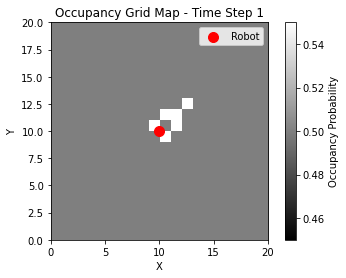

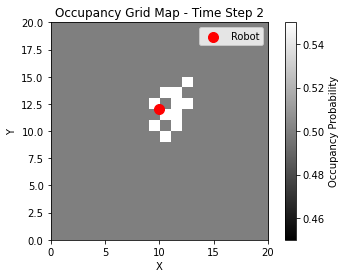

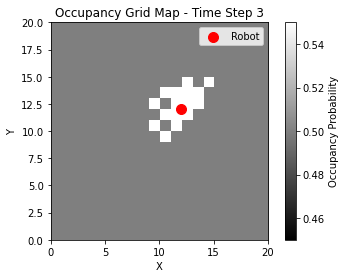

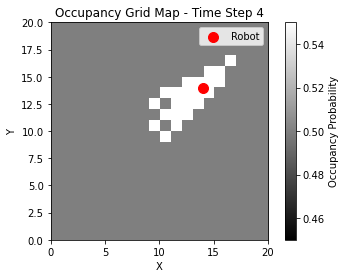

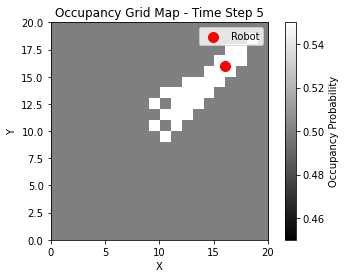

In [28]:
# Update and visualize the occupancy grid at each time step
for t, (sensor_position, measurements) in enumerate(zip(sensor_positions, measurements_list), start=1):
    occupancy_grid = update_occupancy_grid(occupancy_grid, measurements, sensor_position)
    visualize_grid(occupancy_grid, sensor_position, title=f'Occupancy Grid Map - Time Step {t}')


## Visual Output

Running the above code will generate visualizations of the occupancy grid map at each time step, illustrating how the grid is updated with new measurements as the robot moves:
1. Time Step 1: Initial measurements update the grid.
2. Time Step 2: Robot moves and takes new measurements, further refining the grid.
3. Time Step 3: More measurements continue to refine the grid.
4. Time Step 4: Further updates with new measurements.
5. Time Step 5: Final updates with the latest measurements.

Each visualization will show different shades of gray representing the occupancy probabilities of the cells, with the robot's position marked as a red dot, making it easier to track the robot's movement and its effect on the occupancy grid.


### Applications
- Robot Navigation: Helps robots to navigate through environments by avoiding obstacles.
- Simultaneous Localization and Mapping (SLAM): Used in SLAM algorithms where the robot simultaneously builds a map and estimates its position.
- Path Planning: Assists in finding optimal paths by identifying free and occupied spaces.

## Advantages and Disadvantages

### Advantages:

- Simple and intuitive representation.
- Suitable for various sensor types.
- Effective for real-time mapping and navigation.

### Disadvantages:

- Requires significant memory for large environments (especially in 3D).
- The resolution of the grid impacts both memory usage and accuracy.
- May struggle with dynamic environments where obstacles move frequently.